In [28]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn import over_sampling
from businessscoring import businessgain

In [29]:
from Feature_Engineering import feature_engineering

In [30]:
features = feature_engineering(j_flag=0) # For the full dataset

In [132]:
features.shape
recall_scores = pd.DataFrame(columns=('Model', 'Score'))

In [32]:
features['PotentialFraud'] = features['PotentialFraud'].map({'No': 0, 'Yes': 1})
#features.set_index('Provider', inplace=True)

In [33]:
X = features.drop(['PotentialFraud', 'Service_Type','Provider'], axis=1)
y = features['PotentialFraud'] 

In [34]:
#create seperate dataset with dummy variables to add back after scaling
non_num = X[['Both_Service', 'Inpatient', 'Outpatient',\
            'isFraudConnected']]

#drop dummy variables
X = X.drop(['Both_Service', 'Inpatient', 'Outpatient',\
           'isFraudConnected'], axis =1)

In [35]:
#scale on the training set 
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=(X.columns), index=X.index)
X_scaled.head()

,Phys_Count,Patient_Count,Norm_Patient_Count,Claim_Count,Norm_Claim_Count,Inpatient_Count,Outpatient_Count,Norm_Inpatient_Count,Norm_Outpatient_Count,DuplicateClaims,...,ChronicCond_IschemicHeart_1,ChronicCond_IschemicHeart_2,ChronicCond_Osteoporasis_1,ChronicCond_Osteoporasis_2,ChronicCond_rheumatoidarthritis_1,ChronicCond_rheumatoidarthritis_2,ChronicCond_stroke_1,ChronicCond_stroke_2,NetworkDegree,NoPhysicianCount
0,0.470588,-0.017544,-0.155665,-0.086957,-0.184866,1.142857,-0.114286,1.833333,-1.833333,-0.081081,...,0.095238,-0.266667,-0.111111,0.025641,0.055556,-0.025641,0.500000,-0.057971,0.333333,0.0
1,2.235294,1.614035,0.031527,1.443478,0.030651,13.857143,0.714286,3.833333,-3.833333,1.783784,...,1.928571,0.800000,1.111111,1.846154,1.388889,1.743590,1.166667,1.661836,0.000000,0.0
2,1.882353,1.982456,0.222660,1.582609,0.143678,0.000000,1.790476,0.000000,0.000000,1.756757,...,1.904762,2.266667,1.944444,2.000000,1.888889,2.051282,2.333333,1.932367,0.666667,0.0
3,0.000000,8.245614,15.763547,13.034783,24.233716,0.000000,14.333333,0.000000,0.000000,9.945946,...,7.833333,9.466667,7.444444,8.615385,6.666667,9.000000,6.166667,8.386473,-0.333333,2.0
4,0.235294,0.578947,0.650246,0.530435,0.593870,0.857143,0.580952,0.500000,-0.500000,0.567568,...,0.523810,0.800000,0.500000,0.615385,0.500000,0.641026,1.166667,0.521739,1.333333,0.0


In [36]:
#add back dummy variables to scaled dataset 
X_scaled = pd.concat((X_scaled, non_num), axis=1)
X_scaled.head(5)

,Phys_Count,Patient_Count,Norm_Patient_Count,Claim_Count,Norm_Claim_Count,Inpatient_Count,Outpatient_Count,Norm_Inpatient_Count,Norm_Outpatient_Count,DuplicateClaims,...,ChronicCond_rheumatoidarthritis_1,ChronicCond_rheumatoidarthritis_2,ChronicCond_stroke_1,ChronicCond_stroke_2,NetworkDegree,NoPhysicianCount,Both_Service,Inpatient,Outpatient,isFraudConnected
0,0.470588,-0.017544,-0.155665,-0.086957,-0.184866,1.142857,-0.114286,1.833333,-1.833333,-0.081081,...,0.055556,-0.025641,0.500000,-0.057971,0.333333,0.0,1,0,0,0.0
1,2.235294,1.614035,0.031527,1.443478,0.030651,13.857143,0.714286,3.833333,-3.833333,1.783784,...,1.388889,1.743590,1.166667,1.661836,0.000000,0.0,1,0,0,1.0
2,1.882353,1.982456,0.222660,1.582609,0.143678,0.000000,1.790476,0.000000,0.000000,1.756757,...,1.888889,2.051282,2.333333,1.932367,0.666667,0.0,0,0,1,0.0
3,0.000000,8.245614,15.763547,13.034783,24.233716,0.000000,14.333333,0.000000,0.000000,9.945946,...,6.666667,9.000000,6.166667,8.386473,-0.333333,2.0,0,0,1,0.0
4,0.235294,0.578947,0.650246,0.530435,0.593870,0.857143,0.580952,0.500000,-0.500000,0.567568,...,0.500000,0.641026,1.166667,0.521739,1.333333,0.0,1,0,0,0.0


In [37]:
#use as cv=skf, ensures results are consistent in each partition
s_kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True);

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# SMOTE upsampling for all models
oversample = over_sampling.SMOTE()
X_train_Bal, y_train_Bal = oversample.fit_resample(X_train, y_train)

y_train_Bal.value_counts()

1    3923
0    3923
Name: PotentialFraud, dtype: int64

In [39]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

### Examining VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train_Bal.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [round(variance_inflation_factor(X_train_Bal.values, i),3)
                          for i in range(len(X_train_Bal.columns))] 
  
print(vif_data)

/home/annie/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              feature          VIF
0                          Phys_Count        3.794
1                       Patient_Count          inf
2                  Norm_Patient_Count       33.418
3                         Claim_Count          inf
4                    Norm_Claim_Count       36.468
5                     Inpatient_Count          inf
6                    Outpatient_Count          inf
7                Norm_Inpatient_Count  8037674.293
8               Norm_Outpatient_Count  8037592.642
9                     DuplicateClaims       34.947
10           Duplicate_Claims_Percent        1.214
11                   AvgClaimDuration        2.447
12                           Avg_Cost        7.115
13                            Avg_Age        1.016
14                            Gender1          inf
15                            Gender2          inf
16                              Race1          inf
17                              Race2          inf
18                             

### Examining Correlation Matrix

In [41]:
# Correlation Matrix 
corr = features.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
plt.style.use('ggplot')

#### SMOTE balanced data

In [48]:
# SMOTE balancing
logistic = LogisticRegression(C=0.237, solver = 'liblinear',penalty='l2')
logistic.fit(X_train_Bal, y_train_Bal)
logistic.score(X_test, y_test)
print("SMOTE; \nLogistic Regression Baseline recall score: ", recall_score(y_test,logistic.predict(X_test)))

SMOTE; 
Logistic Regression Baseline recall score:  0.9306930693069307


In [49]:
grid_para_logit = {
    'C': np.linspace(0,2,20)
}
grid_search_logit = ms.GridSearchCV(logistic, grid_para_logit, cv=s_kf, scoring='recall', n_jobs=-1)
%time grid_search_logit.fit(X_train_Bal, y_train_Bal)

CPU times: user 402 ms, sys: 12.7 ms, total: 415 ms
Wall time: 5.29 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(C=0.237, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])},
             scoring='recall')

In [50]:
#SMOTE
logit_final = grid_search_logit.best_estimator_
print(grid_search_logit.best_params_)
print("Logistic Regression Grid Search train recall score: ", grid_search_logit.best_score_)
print("Logistic Best Estimator Validation set recall score: ", recall_score(y_test,logit_final.predict(X_test)))
print("Logistic Best Estimator Validation set business score: ", businessgain(y_test,logit_final.predict(X_test)))
SMOTE_logit = recall_score(y_test,logit_final.predict(X_test))

{'C': 1.894736842105263}
Logistic Regression Grid Search train recall score:  0.9625285974262316
Logistic Best Estimator Validation set recall score:  0.9405940594059405
Logistic Best Estimator Validation set business score:  0.8562727129589525


#### imblearn balanced dataset

In [51]:
# imblearn balancing
logistic = LogisticRegression(C=0.237, solver = 'liblinear',penalty='l2')
logistic.fit(X_ros, y_ros)
logistic.score(X_test, y_test)
print("Random oversampling; \nLogistic Regression Baseline recall score: ", recall_score(y_test,logistic.predict(X_test)))

Random oversampling; 
Logistic Regression Baseline recall score:  0.9504950495049505


In [52]:
grid_para_logit = {
    'C': np.linspace(0,2,20)
}
grid_search_logit = ms.GridSearchCV(logistic, grid_para_logit, cv=s_kf, scoring='recall', n_jobs=-1)
%time grid_search_logit.fit(X_ros, y_ros)

CPU times: user 429 ms, sys: 9.68 ms, total: 439 ms
Wall time: 5.68 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(C=0.237, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])},
             scoring='recall')

In [53]:
logit_final = grid_search_logit.best_estimator_
print(grid_search_logit.best_params_)
print("Logistic Regression Grid Search train recall score: ", grid_search_logit.best_score_)
print("Logistic Best Estimator Validation set recall score: ", recall_score(y_test,logit_final.predict(X_test)))
print("Logistic Best Estimator Validation set business score: ", businessgain(y_test,logit_final.predict(X_test)))
imblearn_logit = recall_score(y_test,logit_final.predict(X_test))

{'C': 1.894736842105263}
Logistic Regression Grid Search train recall score:  0.9434105680488756
Logistic Best Estimator Validation set recall score:  0.9702970297029703
Logistic Best Estimator Validation set business score:  0.9064507254593345


#### Comparing SMOTE and imblearn

In [54]:
print('SMOTE logit recall score: ', SMOTE_logit, '\nimblearn logit recall score: ', imblearn_logit)

SMOTE logit recall score:  0.9405940594059405 
imblearn logit recall score:  0.9702970297029703


In [133]:
recall_scores.loc[0] = 'Logistic', round(SMOTE_logit, 2)

#### feature importance for logistic regression

,Feature,Score
45,isFraudConnected,15.928973
40,NetworkDegree,4.766024
44,Outpatient,1.904514
43,Inpatient,1.092413
3,Claim_Count,1.004169
9,DuplicateClaims,0.900701
6,Outpatient_Count,0.884610
28,ChronicCond_Depression_1,0.618266
29,ChronicCond_Depression_2,0.583342
22,ChronicCond_KidneyDisease_1,0.523677


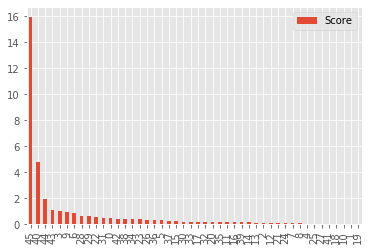

In [55]:
importance = logit_final.coef_[0]
feature_importance = pd.DataFrame(columns = ('Feature', 'Score'))

# summarize feature importance
for i,v in enumerate(importance):
    feature_importance.loc[i] = X_train_Bal.columns[i], np.abs(v)
    
# plot feature importance
scores = feature_importance.sort_values(by = 'Score', ascending=False)
scores.plot.bar()
scores

### Stochastic Gradient Descent Classifier

In [56]:
from sklearn.linear_model import SGDClassifier

#### SMOTE

In [64]:
# SMOTE
sgd = SGDClassifier(loss='log', max_iter=1e4, l1_ratio=0, alpha=1e-4, shuffle=False)
sgd.fit(X_train_Bal, y_train_Bal)
print("SMOTE: \nSGD Baseline recall score: ", recall_score(y_test,sgd.predict(X_test)))

SMOTE: 
SGD Baseline recall score:  0.9900990099009901


In [65]:
grid_para_sgd = {
    'max_iter': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'alpha': np.linspace(5e-4,1e-4,30)
}
grid_search_sgd = ms.GridSearchCV(sgd, grid_para_sgd, cv=s_kf, scoring='recall', n_jobs=-1)
%time grid_search_sgd.fit(X_train_Bal, y_train_Bal)

CPU times: user 2.72 s, sys: 68.1 ms, total: 2.78 s
Wall time: 16.9 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SGDClassifier(l1_ratio=0, loss='log', max_iter=10000.0,
                                     shuffle=False),
             n_jobs=-1,
             param_grid={'alpha': array([0.0005    , 0.00048621, 0.00047241, 0.00045862, 0.00044483,
       0.00043103, 0.00041724, 0.00040345, 0.00038966, 0.00037586,
       0.00036207, 0.00034828, 0.00033448, 0.00032069, 0.0003069 ,
       0.0002931 , 0.00027931, 0.00026552, 0.00025172, 0.00023793,
       0.00022414, 0.00021034, 0.00019655, 0.00018276, 0.00016897,
       0.00015517, 0.00014138, 0.00012759, 0.00011379, 0.0001    ]),
                         'max_iter': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                      10000]},
             scoring='recall')

In [66]:
print("SMOTE:")
print("SGD Grid Search best params: ", grid_search_sgd.best_params_)
print("SGD Grid Search Training set recall score: ", grid_search_sgd.best_score_)
sgd_final = grid_search_sgd.best_estimator_
print("SGD Best Estimator Validation set recall score: ", recall_score(y_test,sgd_final.predict(X_test)))
print("SGD Best Estimator Validation set business score: ", businessgain(y_test,sgd_final.predict(X_test)))
SMOTE_sgd = recall_score(y_test,sgd_final.predict(X_test))

SMOTE:
SGD Grid Search best params:  {'alpha': 0.00011379310344827582, 'max_iter': 100}
SGD Grid Search Training set recall score:  0.98649259066684
SGD Best Estimator Validation set recall score:  0.9900990099009901
SGD Best Estimator Validation set business score:  0.7781063945504472


#### imblearn balanced

In [67]:
sgd = SGDClassifier(loss='log', max_iter=1e4, l1_ratio=0, alpha=1e-4, shuffle=False)
sgd.fit(X_ros, y_ros)
print("Imblearn Balanced: \nSGD Baseline recall score: ", recall_score(y_test,sgd.predict(X_test)))

Imblearn Balanced: 
SGD Baseline recall score:  0.9900990099009901


In [68]:
grid_para_sgd = {
    'max_iter': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'alpha': np.linspace(5e-4,1e-4,30)
}
grid_search_sgd = ms.GridSearchCV(sgd, grid_para_sgd, cv=s_kf, scoring='recall', n_jobs=-1)
%time grid_search_sgd.fit(X_ros, y_ros)

CPU times: user 2.39 s, sys: 73.4 ms, total: 2.46 s
Wall time: 12.7 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SGDClassifier(l1_ratio=0, loss='log', max_iter=10000.0,
                                     shuffle=False),
             n_jobs=-1,
             param_grid={'alpha': array([0.0005    , 0.00048621, 0.00047241, 0.00045862, 0.00044483,
       0.00043103, 0.00041724, 0.00040345, 0.00038966, 0.00037586,
       0.00036207, 0.00034828, 0.00033448, 0.00032069, 0.0003069 ,
       0.0002931 , 0.00027931, 0.00026552, 0.00025172, 0.00023793,
       0.00022414, 0.00021034, 0.00019655, 0.00018276, 0.00016897,
       0.00015517, 0.00014138, 0.00012759, 0.00011379, 0.0001    ]),
                         'max_iter': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                      10000]},
             scoring='recall')

In [69]:
print("SGD Grid Search best params: ", grid_search_sgd.best_params_)
print("SGD Grid Search Training set recall score: ", grid_search_sgd.best_score_)
sgd_final = grid_search_sgd.best_estimator_
print("SGD Best Estimator Validation set recall score: ", recall_score(y_test,sgd_final.predict(X_test)))
print("SGD Best Estimator Validation set business score: ", businessgain(y_test,sgd_final.predict(X_test)))
imblearn_sgd = recall_score(y_test,sgd_final.predict(X_test))

SGD Grid Search best params:  {'alpha': 0.0001, 'max_iter': 100}
SGD Grid Search Training set recall score:  0.9898033926946574
SGD Best Estimator Validation set recall score:  0.9900990099009901
SGD Best Estimator Validation set business score:  0.7707240520755053


#### Comparing SMOTE with imblearn

In [70]:
print('SMOTE SGD recall score: ', SMOTE_sgd, '\nimblearn SGD recall score: ', imblearn_sgd)

SMOTE SGD recall score:  0.9900990099009901 
imblearn SGD recall score:  0.9900990099009901


In [134]:
recall_scores.loc[1] = 'SGD', round(SMOTE_sgd, 2)

#### SGD feature Importance

,Feature,Score
45,isFraudConnected,100.567248
42,Both_Service,52.414017
44,Outpatient,47.767895
6,Outpatient_Count,18.938716
40,NetworkDegree,17.380639
3,Claim_Count,11.928095
41,NoPhysicianCount,11.634595
8,Norm_Outpatient_Count,9.885706
7,Norm_Inpatient_Count,9.885706
9,DuplicateClaims,9.616213


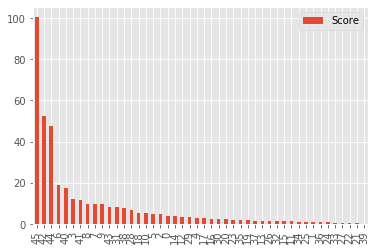

In [71]:
importance = sgd_final.coef_[0]
feature_importance = pd.DataFrame(columns = ('Feature', 'Score'))

# summarize feature importance
for i,v in enumerate(importance):
    feature_importance.loc[i] = X_train_Bal.columns[i], np.abs(v)
    
# plot feature importance
scores = feature_importance.sort_values(by = 'Score', ascending=False)
scores.plot.bar()
scores

### K-Nearest Neighbors

#### SMOTE

In [72]:
knn = KNeighborsClassifier()
knn.fit(X_train_Bal, y_train_Bal)
print("SMOTE: \nKNN Baseline Training Set recall score: ", recall_score(y_train_Bal,knn.predict(X_train_Bal)))
print("KNN Baseline Validation Set recall score: ", recall_score(y_test,knn.predict(X_test)))

SMOTE: 
KNN Baseline Training Set recall score:  0.9989803721641601
KNN Baseline Validation Set recall score:  0.8811881188118812


In [74]:
# grid search
params = {'n_neighbors': np.arange(0,10)+70}

knn_GS =  GridSearchCV(knn, param_grid = params,
                       cv=s_kf, n_jobs=(-1), verbose = 1,
                       return_train_score = True,
                       scoring = 'recall')

knn_GS.fit(X_train_Bal, y_train_Bal)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   42.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79])},
             return_train_score=True, scoring='recall', verbose=1)

In [75]:
print("KNN Grid Search Best params: ", knn_GS.best_params_)
best_knn = knn_GS.best_estimator_
print("KNN Grid Search Training set Recall score: ", recall_score(y_train_Bal, best_knn.predict(X_train_Bal)))
print("KNN Grid Search Validation set Recall score: ", recall_score(y_test, best_knn.predict(X_test)))
print("KNN Grid Search Validation set business score: ", businessgain(y_test, best_knn.predict(X_test)))
SMOTE_knn = recall_score(y_test, best_knn.predict(X_test))

KNN Grid Search Best params:  {'n_neighbors': 71}
KNN Grid Search Training set Recall score:  0.9546265613051236
KNN Grid Search Validation set Recall score:  0.9405940594059405
KNN Grid Search Validation set business score:  0.7077030706507478


#### imblearn

In [76]:
knn = KNeighborsClassifier()
knn.fit(X_ros, y_ros)
print("imblearn: \nKNN Baseline Training Set recall score: ", recall_score(y_ros,knn.predict(X_ros)))
print("KNN Baseline Validation Set recall score: ", recall_score(y_test,knn.predict(X_test)))

imblearn: 
KNN Baseline Training Set recall score:  1.0
KNN Baseline Validation Set recall score:  0.801980198019802


In [77]:
# grid search
params = {'n_neighbors': np.arange(0,10)+70}

knn_GS =  GridSearchCV(knn, param_grid = params,
                       cv=s_kf, n_jobs=(-1), verbose = 1,
                       return_train_score = True,
                       scoring = 'recall')

knn_GS.fit(X_ros, y_ros)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79])},
             return_train_score=True, scoring='recall', verbose=1)

In [78]:
print("KNN Grid Search Best params: ", knn_GS.best_params_)
best_knn = knn_GS.best_estimator_
print("KNN Grid Search Training set Recall score: ", recall_score(y_ros, best_knn.predict(X_ros)))
print("KNN Grid Search Validation set Recall score: ", recall_score(y_test, best_knn.predict(X_test)))
print("KNN Grid Search Validation set business score: ", businessgain(y_test, best_knn.predict(X_test)))
imblearn_knn = recall_score(y_test, best_knn.predict(X_test))

KNN Grid Search Best params:  {'n_neighbors': 79}
KNN Grid Search Training set Recall score:  0.9140963548304869
KNN Grid Search Validation set Recall score:  0.9306930693069307
KNN Grid Search Validation set business score:  0.7109709106869211


#### Comparing SMOTE and imblearn

In [79]:
print('SMOTE KNN recall score: ', SMOTE_knn, '\nimblearn KNN recall score: ', imblearn_knn)

SMOTE KNN recall score:  0.9405940594059405 
imblearn KNN recall score:  0.9306930693069307


In [135]:
recall_scores.loc[2] = 'KNN', round(SMOTE_knn, 2)

In [80]:
confusion_matrix(y_test, best_knn.predict(X_test))

array([[825, 156],
       [  7,  94]])

### Support Vector Machine

#### SMOTE

In [81]:
svm = SVC(class_weight='balanced')
svm.fit(X_train_Bal, y_train_Bal)

SVC(class_weight='balanced')

In [82]:
# baseline score
svm_train_recall = recall_score(y_train_Bal, svm.predict(X_train_Bal))
svm_test_recall = recall_score(y_test, svm.predict(X_test))

print('SMOTE: \nSVM BaseLine Train Set Recall Score:', svm_train_recall)
print('SVM BaseLine Validation Set Recall Score:', svm_test_recall)

SMOTE: 
SVM BaseLine Train Set Recall Score: 0.9653326535814428
SVM BaseLine Validation Set Recall Score: 0.900990099009901


In [83]:
# grid search 
params = {'C': np.logspace(-1,2,10), 
          'kernel': ['rbf'],
          'gamma':('auto', 'scale')}

svm_GS =  GridSearchCV(svm, params, cv=s_kf, n_jobs=(-1), verbose = 1, return_train_score = True, scoring = 'recall')
svm_GS.fit(X_train_Bal, y_train_Bal)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ]),
                         'gamma': ('auto', 'scale'), 'kernel': ['rbf']},
             return_train_score=True, scoring='recall', verbose=1)

In [84]:
print("SVM Grid Search Best params: ", svm_GS.best_params_)
best_svm = svm_GS.best_estimator_
print("SVM Grid Search Training set Recall score: ", recall_score(y_train_Bal, best_svm.predict(X_train_Bal)))
print("SVM Grid Search Validation set Recall score: ", recall_score(y_test, best_svm.predict(X_test)))
print('Test Set business Score:', businessgain(y_test, best_svm.predict(X_test)))
SMOTE_svm = recall_score(y_test, best_svm.predict(X_test))

SVM Grid Search Best params:  {'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Grid Search Training set Recall score:  0.9994901860820801
SVM Grid Search Validation set Recall score:  0.8811881188118812
Test Set business Score: 0.7171593899647435


#### imblearn

In [85]:
svm = SVC(class_weight='balanced')
svm.fit(X_ros, y_ros)

SVC(class_weight='balanced')

In [86]:
# baseline score
svm_train_recall = recall_score(y_ros, svm.predict(X_ros))
svm_test_recall = recall_score(y_test, svm.predict(X_test))

print('imblearn: \nSVM BaseLine Train Set Recall Score:', svm_train_recall)
print('SVM BaseLine Validation Set Recall Score:', svm_test_recall)

imblearn: 
SVM BaseLine Train Set Recall Score: 0.936528167218965
SVM BaseLine Validation Set Recall Score: 0.9405940594059405


In [89]:
# grid search 
params = {'C': np.logspace(0,3,10), 
          'kernel': ['rbf'],
          'gamma':('auto', 'scale')}

svm_GS =  GridSearchCV(svm, params, cv=s_kf, n_jobs=(-1), verbose = 1, return_train_score = True, scoring = 'recall')
svm_GS.fit(X_ros, y_ros)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ]),
                         'gamma': ('auto', 'scale'), 'kernel': ['rbf']},
             return_train_score=True, scoring='recall', verbose=1)

In [90]:
print("imblearn: \nSVM Grid Search Best params: ", svm_GS.best_params_)
best_svm = svm_GS.best_estimator_
print("SVM Grid Search Training set Recall score: ", recall_score(y_ros, best_svm.predict(X_ros)))
print("SVM Grid Search Validation set Recall score: ", recall_score(y_test, best_svm.predict(X_test)))
print('Test Set business Score:', businessgain(y_test, best_svm.predict(X_test)))
imblearn_svm = recall_score(y_test, best_svm.predict(X_test))

imblearn: 
SVM Grid Search Best params:  {'C': 464.15888336127773, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Grid Search Training set Recall score:  1.0
SVM Grid Search Validation set Recall score:  0.5148514851485149
Test Set business Score: -0.03489252635871148


#### Comparing SMOTE and imblearn

In [91]:
print('SMOTE svm recall score: ', SMOTE_svm, '\nimblearn svm recall score: ', imblearn_svm)

SMOTE svm recall score:  0.8811881188118812 
imblearn svm recall score:  0.5148514851485149


In [136]:
recall_scores.loc[3] = 'SVC', round(SMOTE_svm, 2)

In [92]:
#recall = TP / (TP+FN) 
confusion_matrix(y_test, best_svm.predict(X_test))

array([[960,  21],
       [ 49,  52]])

### Discriminant Analysis

#### SMOTE

In [168]:
from sklearn import discriminant_analysis

#### Your code here, name your model object LDA
LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(X_train_Bal, y_train_Bal)

LinearDiscriminantAnalysis()

In [169]:
y_predict = LDA.predict(X_test)
print("SMOTE: \nLDA Baseline validation set recall score: ", recall_score(y_test,y_predict))
print("LDA Baseline validation set business score: ", businessgain(y_test,y_predict))

SMOTE: 
LDA Baseline validation set recall score:  0.8316831683168316
LDA Baseline validation set business score:  0.631399014340896


In [170]:
QDA = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA.fit(X_train_Bal, y_train_Bal)
y_predict = QDA.predict(X_test)

print("QDA Baseline validation set recall score: ", recall_score(y_test,y_predict))
print("QDA Baseline validation set business score: ", businessgain(y_test,y_predict))


QDA Baseline validation set recall score:  0.8712871287128713
QDA Baseline validation set business score:  0.7153428347319036


/Users/marcuschoi/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Random Forest

In [93]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

# fit RF model on SMOTE training set
randomForest.set_params(random_state=0)

randomForest.fit(X_train_Bal, y_train_Bal)

# baseline score
print('SMOTE: \nRF BaseLine Train Set Recall Score:', recall_score(y_train_Bal, randomForest.predict(X_train_Bal)))
print('RF BaseLine Validation Set Recall Score:', recall_score(y_test, randomForest.predict(X_test)))

SMOTE: 
RF BaseLine Train Set Recall Score: 1.0
RF BaseLine Validation Set Recall Score: 0.8910891089108911


In [94]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['entropy'],
    'max_depth': range(1, 30),
    'n_estimators': range(10, 100, 10)
}

# run the RF classifier through the grid search
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='recall', cv=s_kf, n_jobs=-1)
%time grid_search_forest.fit(X_train_Bal, y_train_Bal)

CPU times: user 9.68 s, sys: 182 ms, total: 9.87 s
Wall time: 5min 40s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 30),
                         'n_estimators': range(10, 100, 10)},
             scoring='recall')

In [95]:
print("RF Grid Search Best params: ", grid_search_forest.best_params_)
best_RF = grid_search_forest.best_estimator_
print("RF Grid Search Training set Recall score: ", recall_score(y_train_Bal, best_RF.predict(X_train_Bal)))
print("RF Grid Search Validation set Recall score: ", recall_score(y_test, best_RF.predict(X_test)))
print("RF Grid Search Validation set Business score: ", businessgain(y_test,best_RF.predict(X_test)))
SMOTE_rf = recall_score(y_test, best_RF.predict(X_test))

RF Grid Search Best params:  {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 70}
RF Grid Search Training set Recall score:  1.0
RF Grid Search Validation set Recall score:  0.900990099009901
RF Grid Search Validation set Business score:  0.7826015490230797


#### imblearn

In [96]:
randomForest.set_params(random_state=0)

randomForest.fit(X_ros, y_ros)

# baseline score
print('imblearn: \nRF BaseLine Train Set Recall Score:', recall_score(y_ros, randomForest.predict(X_ros)))
print('RF BaseLine Validation Set Recall Score:', recall_score(y_test, randomForest.predict(X_test)))

imblearn: 
RF BaseLine Train Set Recall Score: 1.0
RF BaseLine Validation Set Recall Score: 0.8910891089108911


In [97]:
# set the parameter grid
grid_para_forest = {
    'criterion': ['entropy'],
    'max_depth': range(1, 30),
    'n_estimators': range(10, 100, 10)
}

# run the RF classifier through the grid search
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='recall', cv=s_kf, n_jobs=-1)
%time grid_search_forest.fit(X_ros, y_ros)

CPU times: user 8.58 s, sys: 244 ms, total: 8.83 s
Wall time: 3min 12s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(1, 30),
                         'n_estimators': range(10, 100, 10)},
             scoring='recall')

In [98]:
print("RF Grid Search Best params: ", grid_search_forest.best_params_)
best_RF = grid_search_forest.best_estimator_
print("RF Grid Search Training set Recall score: ", recall_score(y_ros, best_RF.predict(X_ros)))
print("RF Grid Search Validation set Recall score: ", recall_score(y_test, best_RF.predict(X_test)))
print("RF Grid Search Validation set Business score: ", businessgain(y_test,best_RF.predict(X_test)))
imblearn_rf = recall_score(y_test, best_RF.predict(X_test))

RF Grid Search Best params:  {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 30}
RF Grid Search Training set Recall score:  1.0
RF Grid Search Validation set Recall score:  0.9108910891089109
RF Grid Search Validation set Business score:  0.7950211867461575


#### comparing SMOTE and imblearn

In [99]:
print('SMOTE rf recall score: ', SMOTE_rf, '\nimblearn rf recall score: ', imblearn_rf)

SMOTE rf recall score:  0.900990099009901 
imblearn rf recall score:  0.9108910891089109


In [137]:
recall_scores.loc[4] = 'RF', round(SMOTE_rf, 2)

### XG BOOST 

In [100]:
from xgboost import XGBClassifier

#SMOTE
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train_Bal, y_train_Bal)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
print('SMOTE: \nXGB BaseLine Train Set Recall Score:', recall_score(y_train_Bal, xgb.predict(X_train_Bal)))
print('XGB BaseLine Validation Set Recall Score:', recall_score(y_test, xgb.predict(X_test)))

SMOTE: 
XGB BaseLine Train Set Recall Score: 0.99974509304104
XGB BaseLine Validation Set Recall Score: 0.9207920792079208


In [117]:
# parameter tuning
grid_para_xgb = {'scale_pos_weight': [300,350,400],
                 'learning_rate': [0.1, 1, 1.5],
                 'n_estimators': [2,3,5] ,
                 'max_depth': [1,3,5],
                 'subsample': [0.9]
                 } 

In [118]:
grid_search_xgb = GridSearchCV(xgb, grid_para_xgb, scoring='recall', cv=s_kf, n_jobs=-1)
%time grid_search_xgb.fit(X_train_Bal, y_train_Bal)

CPU times: user 1.4 s, sys: 40.7 ms, total: 1.44 s
Wall time: 6.63 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_...traints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                  

In [119]:
grid_search_xgb.best_params_

{'learning_rate': 1,
 'max_depth': 1,
 'n_estimators': 3,
 'scale_pos_weight': 400,
 'subsample': 0.9}

In [120]:
best_xgb = grid_search_xgb.best_estimator_
print('XGB BaseLine Train Set Recall Score:', recall_score(y_train_Bal, best_xgb.predict(X_train_Bal)))
print('XGB BaseLine Validation Set Recall Score:', recall_score(y_test, best_xgb.predict(X_test)))
print('XGB BaseLine Validation Set business Score:', businessgain(y_test, best_xgb.predict(X_test)))
SMOTE_xgb = recall_score(y_test, best_xgb.predict(X_test))

XGB BaseLine Train Set Recall Score: 1.0
XGB BaseLine Validation Set Recall Score: 1.0
XGB BaseLine Validation Set business Score: 0.17133205718777744


#### imblearn

In [121]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_ros, y_ros)
print('imblearn: \nXGB BaseLine Train Set Recall Score:', recall_score(y_ros, xgb.predict(X_ros)))
print('XGB BaseLine Validation Set Recall Score:', recall_score(y_test, xgb.predict(X_test)))

imblearn: 
XGB BaseLine Train Set Recall Score: 1.0
XGB BaseLine Validation Set Recall Score: 0.9108910891089109


In [126]:
# parameter tuning
grid_para_xgb = {'scale_pos_weight': [200,300,400],
                 'learning_rate': [0.001, 0.01, 0.1],
                 'n_estimators': [2,5,10] ,
                 'max_depth': [1,3,10],
                 'subsample': [0.9]
                 }
grid_search_xgb = GridSearchCV(xgb, grid_para_xgb, scoring='recall', cv=s_kf, n_jobs=-1)
%time grid_search_xgb.fit(X_ros, y_ros)

CPU times: user 1.43 s, sys: 40.4 ms, total: 1.47 s
Wall time: 8.68 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_...='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree

In [127]:
grid_search_xgb.best_params_

{'learning_rate': 0.001,
 'max_depth': 1,
 'n_estimators': 2,
 'scale_pos_weight': 300,
 'subsample': 0.9}

In [128]:
best_xgb = grid_search_xgb.best_estimator_
print('XGB BaseLine Train Set Recall Score:', recall_score(y_ros, best_xgb.predict(X_ros)))
print('XGB BaseLine Validation Set Recall Score:', recall_score(y_test, best_xgb.predict(X_test)))
print('XGB BaseLine Validation Set business Score:', businessgain(y_test, best_xgb.predict(X_test)))
imblearn_xgb = recall_score(y_test, best_xgb.predict(X_test))

XGB BaseLine Train Set Recall Score: 1.0
XGB BaseLine Validation Set Recall Score: 1.0
XGB BaseLine Validation Set business Score: 0.16025854347536467


#### comparing SMOTE and imblearn

In [129]:
print('SMOTE xgb recall score: ', SMOTE_xgb, '\nimblearn xgb recall score: ', imblearn_xgb)

SMOTE xgb recall score:  1.0 
imblearn xgb recall score:  1.0


In [138]:
recall_scores.loc[5] = 'XGBoost', round(SMOTE_xgb, 2)

In [130]:
confusion_matrix(y_test, best_xgb.predict(X_test))

array([[ 71, 910],
       [  0, 101]])

### Comparing Models

In [ ]:
#dataset.groupby('brand')['perf_name'].nunique()
s = pd.DataFrame(dataset['brand'].value_counts().nlargest(20))
s.plot.bar(color = 'green')
plt.title('Top Twenty Best-Selling Brands')
plt.ylabel('Number of Fragrances')
s = s.reset_index()
s.columns = ['brand', 'count']

dataset['brand'].value_counts().nlargest(20)

from pandas.api.types import CategoricalDtype
# the prices of perfumes from best-selling brands 
bestbrands = s.brand.tolist()

topbrandprice = dataset.loc[(dataset['brand'].isin(bestbrands))][['brand', 'price']]#.sort_values('price($)', ascending=False)

brand_cat = CategoricalDtype(categories = bestbrands, ordered = True)
topbrandprice['brand'] = topbrandprice['brand'].astype(brand_cat)

topbrandplot = topbrandprice.groupby('brand')['price'].mean()#.sort_values(ascending=False)
topbrandplot.plot.bar(color = 'green')
plt.ylabel('Average Price in $')
plt.xlabel('')
plt.title('Price of Fragrances from the Best-Selling Brands')

,Model,Score
0,Logistic,0.94
1,SGD,0.99
2,KNN,0.94
3,SVC,0.88
4,RF,0.90
5,XGBoost,1.00


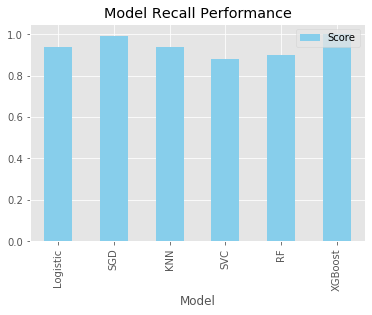

In [167]:
recall_scores.plot.bar(x = 'Model', color = 'skyblue')
plt.title('Model Recall Performance')
recall_scores